In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 유방암 데이터

* 양성 or 음성

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())
print(cancer.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [20]:
import pandas as pd

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


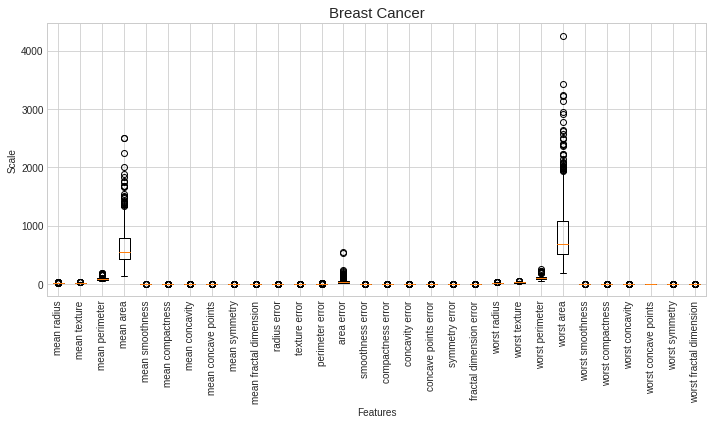

In [22]:
fig = plt.figure(figsize = [10,6])
plt.title('Breast Cancer', fontsize = 15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout()

# Logistic Regression

*   회귀에 포함이 되지만, 클래스가 2인 데이터에 대한 분류 (이진 분류)를 위한 모델
*   Linear regression model(선형 회귀 모델)에 sigmoid function(시그모이드 함수)을 적용해 결과를 출력

*   BinaryCrossEntropy 목적 함수(loss function)을 최소화하는 것이 목표


y_hat = sigmoid(w_1*x_1 + ... + w_n*x_n + bias)


*   실무에서 여전히 많이 사용됨


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

samples = 1000

X, y = make_classification(n_samples = samples, n_features = 2, n_informative = 2, n_redundant= 0, n_clusters_per_class = 1)


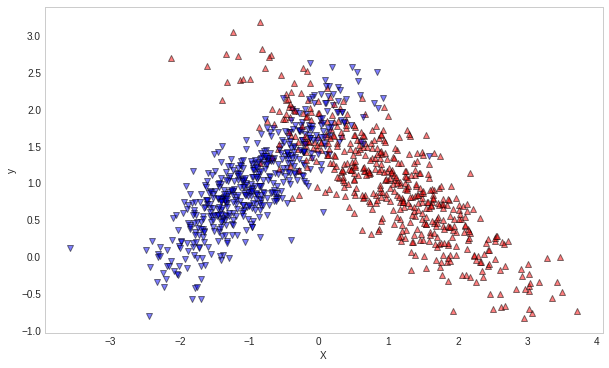

In [4]:
fig, ax = plt.subplots(1,1, figsize = (10,6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i,0], X[i,1], edgecolors = 'k', alpha = 0.5, marker = '^', color = 'r')
  else :
    ax.scatter(X[i,0], X[i,1], edgecolors = 'k', alpha = 0.5, marker = 'v', color = 'b')

plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# model = LogisticRegression()
model = LogisticRegression(solver='lbfgs', multi_class= 'auto', C = 100.0, random_state = 1)

model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))
print()
print(model.coef_)
print(model.intercept_)

Train score : 0.874
Test score : 0.825

[[-2.59914353 -0.5983913 ]]
[0.68590513]


In [17]:
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=10)
print("cv mean score : {:.3f}".format(scores.mean()))

cv mean score : 0.864


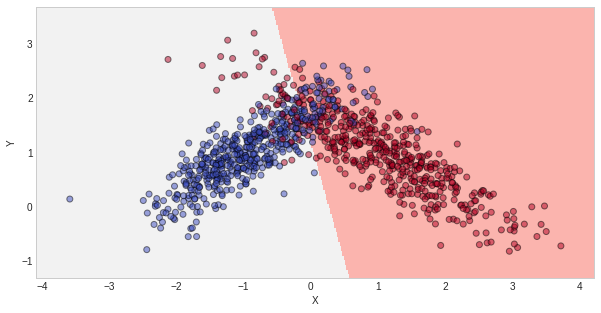

In [18]:
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1, figsize = (10,5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c = np.abs(y - 1), edgecolors = 'k', alpha = 0.5, cmap = plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LogisticRegression(max_iter = 2000)
model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))


Train score : 0.963
Test score : 0.947


# Stochastic Gradient Descent, SGD (확률적 경사 하강법)

*   학습 파라미터에 대한 손실 함수(loss function)의 기울기가 최소가 되도록 학습

*   sci-kit learn에선 선형 SGD regression, SGD classificatino을 지원

In [29]:
# 회귀 문제를 다루기 위해 켈리포니아 주택 가격 데이터를 활용

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 캘리포니아 주택 가격 데이터는 외장 데이터라 설치를 해야됨.
california = fetch_california_housing()

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = make_pipeline(
    StandardScaler(),
    SGDRegressor(loss = 'squared_error')
)

model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))

Train score : 0.597
Test score : 0.611


In [31]:
# 분류 문제를 다루기 때문에 유방암 데이터를 활용

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss = 'log') 
)

model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))

Train score : 0.985
Test score : 0.982
